In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

In [2]:
# Bit of formatting because I don't like the default inline code style:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [3]:
sess = tf.InteractiveSession()

In [4]:
from libs import inception
net = inception.get_inception_model()

In [5]:
nb_utils.show_graph(net['graph_def'])

In [6]:
tf.import_graph_def(net['graph_def'], name='inception')

In [7]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [8]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [10]:
input_name = names[0] + ":0"
x = g.get_tensor_by_name(input_name)

In [11]:
input_name

'inception/input:0'

In [12]:
names[-1] + ':0'

'inception/output2:0'

In [13]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [40]:
softmax.get_shape()

TensorShape([Dimension(None), Dimension(1008)])

0 255


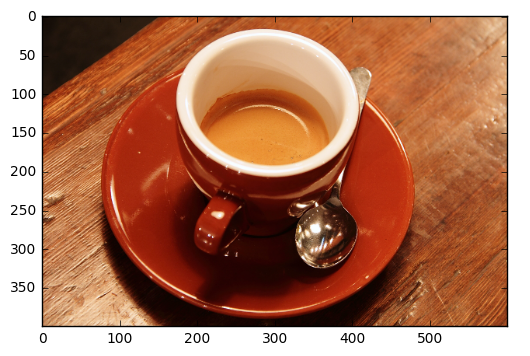

In [14]:
from skimage.data import coffee
og = coffee()
plt.imshow(og)
print(og.min(), og.max())

In [15]:
img = inception.preprocess(og)

In [16]:
print(og.shape),print(img.shape)

(400, 600, 3)
(299, 299, 3)


(None, None)

In [17]:
print(img.min(), img.max())

-117.0 138.0


In [20]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


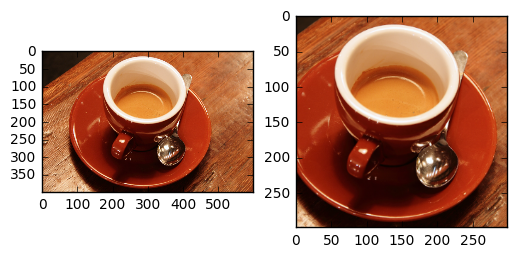

In [22]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(og)
axs[1].imshow(inception.deprocess(img))

In [35]:
img_4d.shape

(1, 299, 299, 3)

In [41]:
img_4d_2 = np.concatenate((img_4d, img_4d), axis=0)

In [52]:
res = softmax.eval(feed_dict={x: img_4d})

In [53]:
res.shape

(16, 1008)

In [54]:
np.squeeze(res)

array([[  1.08247465e-14,   1.91724319e-17,   1.59638166e-12, ...,
          1.08240460e-14,   1.08253259e-14,   1.08247888e-14],
       [  1.43945848e-15,   1.36372873e-18,   2.80957739e-13, ...,
          1.43935970e-15,   1.43953535e-15,   1.43946399e-15],
       [  2.74944269e-15,   2.86159328e-18,   4.06765848e-13, ...,
          2.74925401e-15,   2.74958944e-15,   2.74945328e-15],
       ..., 
       [  1.24471602e-14,   3.66610186e-17,   5.05053161e-12, ...,
          1.24463055e-14,   1.24477768e-14,   1.24471602e-14],
       [  2.28704317e-14,   7.87223620e-17,   7.89168036e-12, ...,
          2.28688613e-14,   2.28716091e-14,   2.28704757e-14],
       [  3.93821558e-13,   2.98510462e-15,   6.53753926e-11, ...,
          3.93794535e-13,   3.93841860e-13,   3.93822317e-13]], dtype=float32)

In [55]:
res.shape

(16, 1008)

In [56]:
res

array([[  1.08247465e-14,   1.91724319e-17,   1.59638166e-12, ...,
          1.08240460e-14,   1.08253259e-14,   1.08247888e-14],
       [  1.43945848e-15,   1.36372873e-18,   2.80957739e-13, ...,
          1.43935970e-15,   1.43953535e-15,   1.43946399e-15],
       [  2.74944269e-15,   2.86159328e-18,   4.06765848e-13, ...,
          2.74925401e-15,   2.74958944e-15,   2.74945328e-15],
       ..., 
       [  1.24471602e-14,   3.66610186e-17,   5.05053161e-12, ...,
          1.24463055e-14,   1.24477768e-14,   1.24471602e-14],
       [  2.28704317e-14,   7.87223620e-17,   7.89168036e-12, ...,
          2.28688613e-14,   2.28716091e-14,   2.28704757e-14],
       [  3.93821558e-13,   2.98510462e-15,   6.53753926e-11, ...,
          3.93794535e-13,   3.93841860e-13,   3.93822317e-13]], dtype=float32)

In [57]:
res = np.mean(res, 0)
res = res / np.sum(res)

In [58]:
res

array([  3.95740501e-14,   2.34581566e-16,   7.38100640e-12, ...,
         3.95713363e-14,   3.95760898e-14,   3.95741247e-14], dtype=float32)

In [59]:
print([(res[idx],net['labels'][idx]) for idx in res.argsort()[-5:][::-1]])

[(0.99849206, (947, 'espresso')), (0.000631253, (859, 'cup')), (0.00050241494, (953, 'chocolate sauce')), (0.00019483209, (844, 'consomme')), (0.00013370356, (822, 'soup bowl'))]


# Visualize Filters

In [61]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


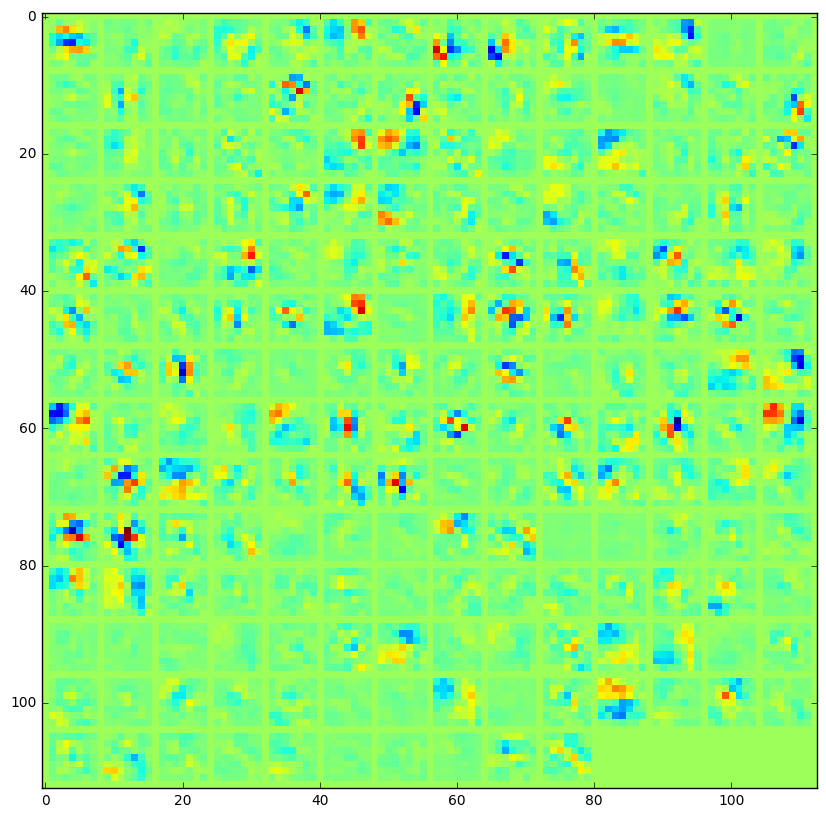

In [62]:
from libs import utils
W_montage = utils.montage_filters(W_eval)
plt.figure(figsize=(10,10))
plt.imshow(W_montage, interpolation='nearest')

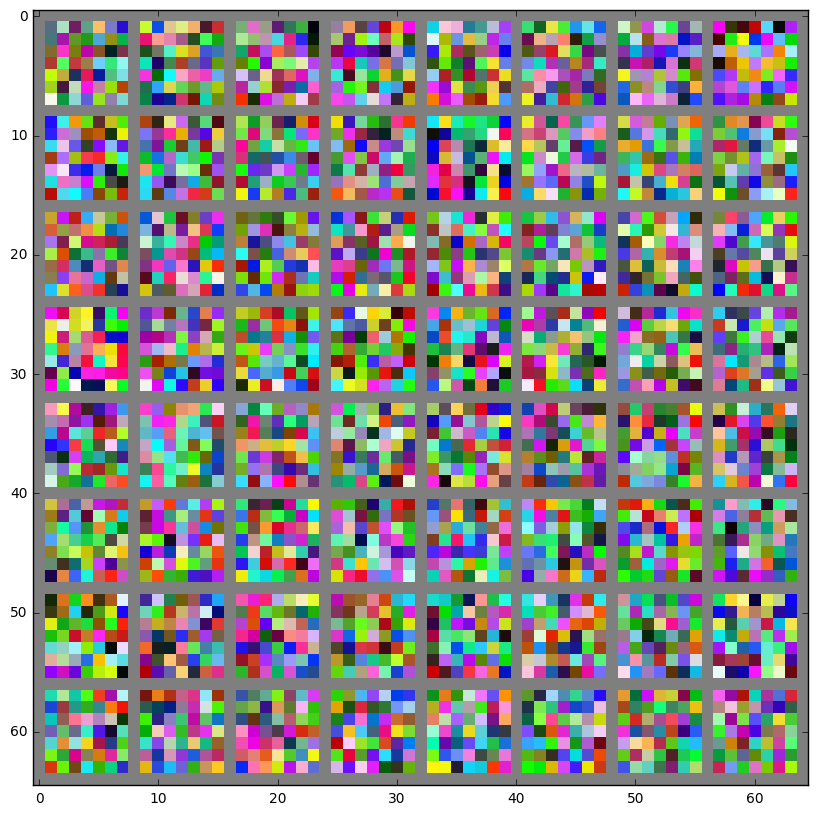

In [63]:
Ws = [utils.montage_filters(W_eval[:,:,[i],:]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)
plt.figure(figsize=(10, 10))
plt.imshow(Ws, interpolation='nearest')

In [66]:
np.min(Ws), np.max(Ws)

(-6.4092006683349609, 6.3349862098693848)

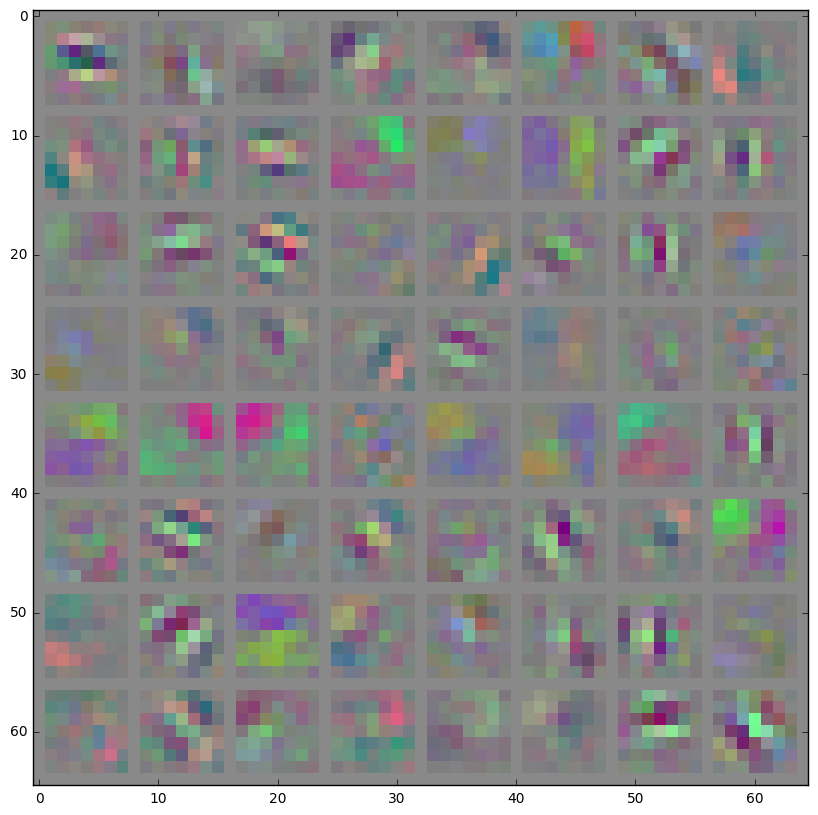

In [68]:
Ws = (Ws/ np.max(np.abs(Ws))* 128+128).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(Ws, interpolation='nearest')

In [69]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')

In [70]:
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})
print(layer_shape)

[  1 150 150  64]


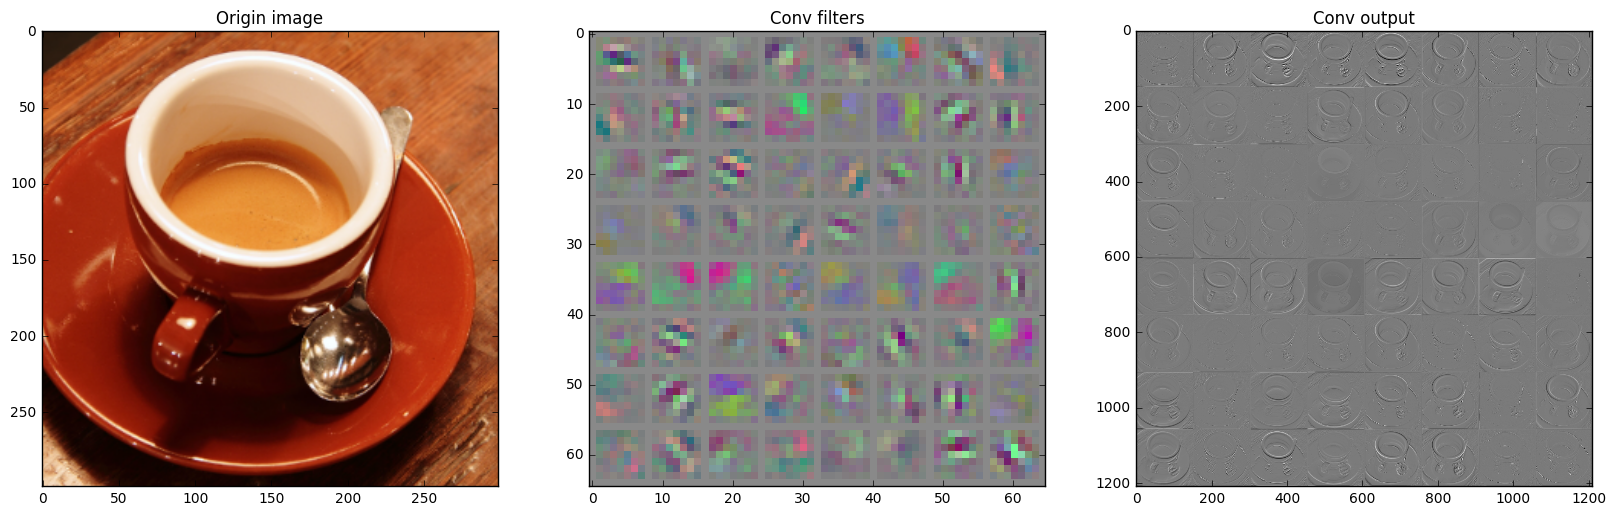

In [71]:
f = feature.eval(feed_dict={ x : img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0],3),3, 2))
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(inception.deprocess(img))
axs[0].set_title("Origin image")
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title("Conv filters")
axs[2].imshow(montage, cmap='gray')
axs[2].set_title("Conv output")

# Visualizing the Gradient

In [74]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(feature, 3), x)

In [75]:
res = sess.run(gradient, feed_dict={x: img_4d})[0]

In [77]:
res.shape

(1, 299, 299, 3)

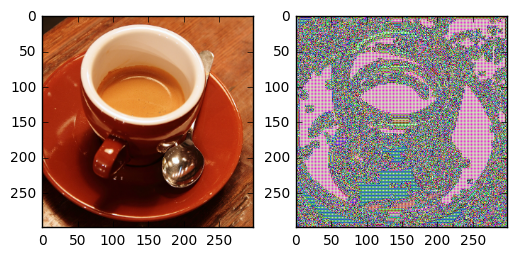

In [78]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(res[0])

In [79]:
def normalize(img, s=0.1):
    """
    Normalize the image range for visualization
    """
    z = img/np.std(img)
    return np.uint8(np.clip(
                (z - z.mean())/max(z.std(), 1e-4)*s + 0.5,0, 1)*255)

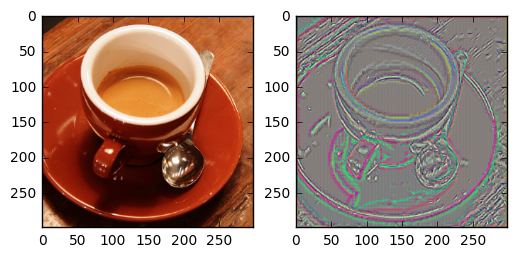

In [80]:
r = normalize(res)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(inception.deprocess(img))
axs[1].imshow(r[0])

In [81]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:, :, :, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder:img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

In [85]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm =  [normalize(gradient_i[0]) for gradient_i in gradients]
motange = utils.montage(np.array(gradients_norm))

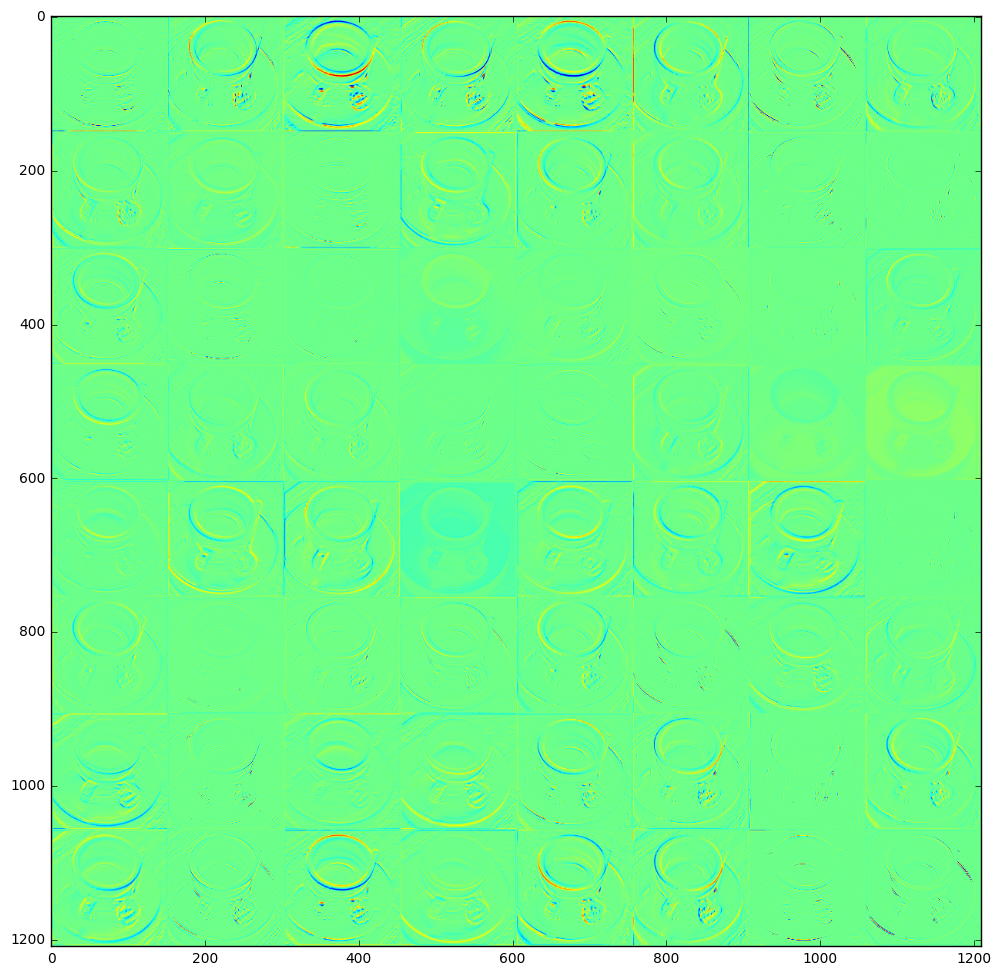

In [87]:
plt.figure(figsize=(12, 12))
plt.imshow(montage)

In [88]:
features = [name for name in names if 'maxpool' in name.split('/')[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


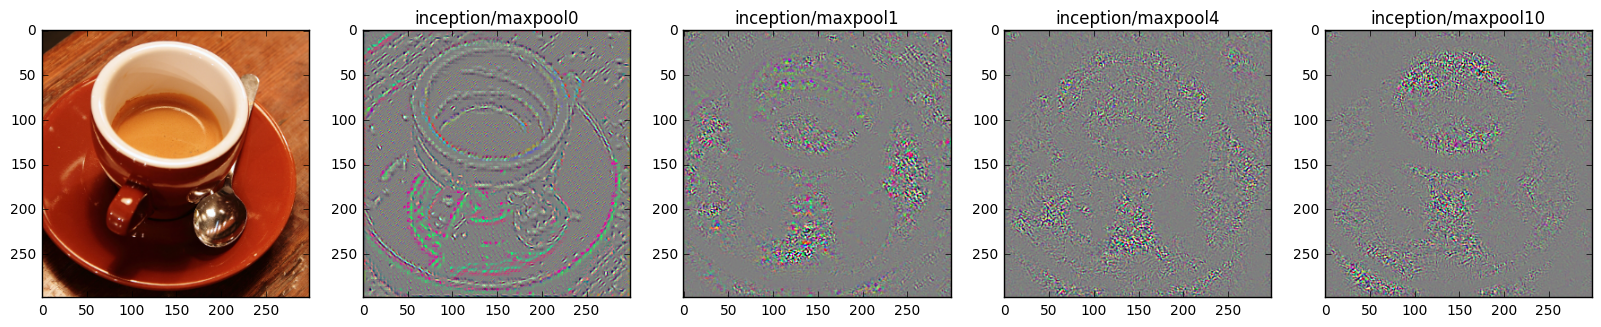

In [89]:
n_plots = len(features) + 1
fig, axs= plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(inception.deprocess(img))
for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename+':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x : base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)